In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#https://www.kaggle.com/code/harbaldeepsidhu/house-price-prediction-using-linearregression

In [4]:
df = pd.read_csv("G:\Data Science\Datasets\Bengaluru_House_Data.csv")

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# Filling NA values

In [7]:
df.fillna(value = {"location":df["location"].mode()[0]},inplace=True)

In [8]:
df.fillna(value = {"size":df["size"].mode()[0]},inplace=True)

In [9]:
df.shape

(13320, 9)

In [10]:
df = df[~df["bath"].isna()==True]

In [11]:
df.shape

(13247, 9)

In [12]:
df1 = df[df["bath"].isna()==True]

In [13]:
df1.shape

(0, 9)

In [14]:
df1["size"] = df1["size"].apply(lambda x:x.split()[0])

In [15]:
df1["size"].value_counts().to_dict()

{}

In [16]:
bhk_dict = {'3': 2, '4':3, '2': 1, '1': 1, '5': 4}
df1["bath"]= df1["size"].map(bhk_dict)
balcony_dict = {'3': 2, '4':3, '2': 1, '1': 1, '5': 3}
df1["balcony"]= df1["size"].map(balcony_dict)

In [17]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


In [18]:
df = pd.concat([df,df1],ignore_index=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13247 entries, 0 to 13246
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13247 non-null  object 
 1   availability  13247 non-null  object 
 2   location      13247 non-null  object 
 3   size          13247 non-null  object 
 4   society       7748 non-null   object 
 5   total_sqft    13247 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13247 non-null  float64
dtypes: float64(3), object(6)
memory usage: 931.6+ KB


In [20]:
df.drop(["society","area_type","availability"],axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13247 entries, 0 to 13246
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13247 non-null  object 
 1   size        13247 non-null  object 
 2   total_sqft  13247 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13247 non-null  float64
dtypes: float64(3), object(3)
memory usage: 621.1+ KB


In [22]:
df2 = df[df["balcony"].isna()==True]
df2["size"] = df2["size"].apply(lambda x:x.split()[0])
df2

C:\Users\WIN 7\AppData\Local\Temp\ipykernel_9348\1314683838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["size"] = df2["size"].apply(lambda x:x.split()[0])


,location,size,total_sqft,bath,balcony,price
6,Old Airport Road,4,2732,4.0,NaN,204.00
7,Rajaji Nagar,4,3300,4.0,NaN,600.00
9,Gandhi Bazar,6,1020,6.0,NaN,370.00
34,Kasturi Nagar,3,1925,3.0,NaN,125.00
40,Murugeshpalya,2,1296,2.0,NaN,81.00
...,...,...,...,...,...,...
13204,Kundalahalli Colony,7,1400,7.0,NaN,218.00
13206,Vishwanatha Nagenahalli,6,1200,5.0,NaN,130.00
13233,Rajarajeshwari Nagara,4,1200,5.0,NaN,325.00
13236,Yeshwanthpur,3,1675,3.0,NaN,92.13


In [23]:
balcony_dict = {'3': 2,
 '4': 2,
 '5': 3,
 '2': 1,
 '6': 4,
 '8':6,
 '9': 5,
 '7': 4,
 '10': 8,
 '19': 15,
 '16': 12,
 '11': 9,
 '1': 1,
 '18': 16}

In [24]:
df2["balcony"] = df2["size"].map(balcony_dict)

C:\Users\WIN 7\AppData\Local\Temp\ipykernel_9348\3405294041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["balcony"] = df2["size"].map(balcony_dict)


In [25]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [26]:
df =df[~df["balcony"].isna()==True]

In [27]:
df = pd.concat([df,df2],ignore_index=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13247 entries, 0 to 13246
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13247 non-null  object 
 1   size        13247 non-null  object 
 2   total_sqft  13247 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     13247 non-null  float64
 5   price       13247 non-null  float64
dtypes: float64(3), object(3)
memory usage: 621.1+ KB


In [29]:
df["size"] = df["size"].apply(lambda x: x.split()[0])

In [30]:
df["size"] = df["size"].astype("int")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13247 entries, 0 to 13246
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13247 non-null  object 
 1   size        13247 non-null  int32  
 2   total_sqft  13247 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     13247 non-null  float64
 5   price       13247 non-null  float64
dtypes: float64(3), int32(1), object(2)
memory usage: 569.3+ KB


In [32]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '7150', '5665.84', '9200'],
      dtype=object)

In [33]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [34]:
df1 = df[~df["total_sqft"].apply(is_float)]
df1

,location,size,total_sqft,bath,balcony,price
27,Yelahanka,4,2100 - 2850,4.0,0.0,186.000
114,Hebbal,4,3067 - 8156,4.0,0.0,477.000
129,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005
153,Sarjapur,2,1145 - 1340,2.0,0.0,43.490
176,KR Puram,2,1015 - 1540,2.0,0.0,56.800
...,...,...,...,...,...,...
12693,Whitefield,4,2830 - 2882,5.0,0.0,154.500
12735,Arekere,9,4125Perch,9.0,5.0,265.000
12744,Singapura Village,2,1100Sq. Yards,2.0,1.0,45.000
12812,Whitefield,4,361.33Sq. Yards,4.0,2.0,270.000


In [35]:
def convert(x):
    l1 = x.split("-")
    if len(l1)==2:
        return (float(l1[0])+float(l1[1]))/2
    try:
        return float(x)
    except:
        return None

In [36]:
df["total_sqft"] = df["total_sqft"].apply(convert)

In [37]:
df = df[~df["total_sqft"].isna()==True]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13201 entries, 0 to 13246
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13201 non-null  object 
 1   size        13201 non-null  int32  
 2   total_sqft  13201 non-null  float64
 3   bath        13201 non-null  float64
 4   balcony     13201 non-null  float64
 5   price       13201 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 670.4+ KB


In [39]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Kothanur,2,1200.0,2.0,1.0,51.00


In [40]:
df["location"].nunique()

1298

In [41]:
location_count = df["location"].value_counts()

In [42]:
location_count_less_10 = location_count[location_count<=10]

In [43]:
df["location"] = df["location"].apply(lambda x: "other" if x in location_count_less_10 else x)

In [44]:
df["location"].nunique()

241

In [45]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Kothanur,2,1200.0,2.0,1.0,51.00


In [46]:
# 1 bhk =300 sqft
df["sqft/bhk"]= df["total_sqft"]/df["size"]

In [47]:
df[(df["sqft/bhk"]<300)]

,location,size,total_sqft,bath,balcony,price,sqft/bhk
51,Murugeshpalya,6,1407.0,4.0,1.0,150.0,234.500000
61,other,8,1350.0,7.0,0.0,85.0,168.750000
63,other,3,500.0,3.0,2.0,100.0,166.666667
71,Kaval Byrasandra,2,460.0,1.0,0.0,22.0,230.000000
81,Rajaji Nagar,6,710.0,6.0,3.0,160.0,118.333333
...,...,...,...,...,...,...,...
13222,JP Nagar,4,600.0,5.0,2.0,110.0,150.000000
13226,5th Block Hbr Layout,5,1200.0,5.0,3.0,205.0,240.000000
13239,other,6,1200.0,3.0,4.0,125.0,200.000000
13242,other,7,1400.0,7.0,4.0,218.0,200.000000


In [48]:
df.shape

(13201, 7)

In [49]:
13201-744

12457

In [50]:
df = df[(df["sqft/bhk"]>=300)]

In [51]:
df.shape

(12457, 7)

In [52]:
df.drop(columns=["sqft/bhk"],inplace=True)

In [53]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Kothanur,2,1200.0,2.0,1.0,51.00


In [54]:
df["price_per_sqft"] = np.round((df["price"]*100000)/(df["total_sqft"]),0).astype("int")

In [55]:
df.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3700
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4306
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6246
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250


In [56]:
df.describe()

,size,total_sqft,bath,balcony,price,price_per_sqft
count,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000
mean,2.649033,1590.190715,2.562816,1.610902,111.185938,6308.424821
std,0.976012,1260.354203,1.080239,0.830972,152.197424,4167.973184
min,1.000000,300.000000,1.000000,0.000000,9.000000,268.000000
25%,2.000000,1115.000000,2.000000,1.000000,49.000000,4211.000000
50%,3.000000,1300.000000,2.000000,2.000000,70.000000,5294.000000
75%,3.000000,1700.000000,3.000000,2.000000,115.000000,6917.000000
max,16.000000,52272.000000,16.000000,12.000000,3600.000000,176471.000000


In [57]:
df.shape

(12457, 7)

# Removing outliers from price_per_sqft column

In [58]:
def outliers_remover(df):
    new_df = pd.DataFrame()
    for location, sub_df in df.groupby("location"):
        # Calculating mean and std of "price_per_sqft column"
        mean = np.mean(sub_df["price_per_sqft"])
        std = np.std(sub_df["price_per_sqft"])
        filtered_df = sub_df[(sub_df["price_per_sqft"]>(mean-std))&(sub_df["price_per_sqft"]<(mean+std))]
        new_df = pd.concat([new_df,filtered_df],ignore_index=True)
    return new_df

In [59]:
df = outliers_remover(df)

In [60]:
df.describe()

,size,total_sqft,bath,balcony,price,price_per_sqft
count,10246.000000,10246.000000,10246.000000,10246.000000,10246.000000,10246.000000
mean,2.572321,1503.817559,2.474136,1.611946,90.976785,5657.804607
std,0.897364,876.734265,0.981958,0.818830,86.135179,2266.062782
min,1.000000,300.000000,1.000000,0.000000,10.000000,1250.000000
25%,2.000000,1108.000000,2.000000,1.000000,49.000000,4245.000000
50%,2.000000,1282.000000,2.000000,2.000000,67.000000,5174.000000
75%,3.000000,1650.000000,3.000000,2.000000,100.000000,6426.000000
max,16.000000,30400.000000,16.000000,12.000000,2200.000000,24510.000000


In [61]:
df.shape

(10246, 7)

In [62]:
df["bath"].sort_values(ascending=False)

10177    16.0
9558     13.0
10207    12.0
5274     12.0
10169    12.0
         ... 
4410      1.0
4409      1.0
8878      1.0
4404      1.0
6620      1.0
Name: bath, Length: 10246, dtype: float64

# Removing outliers from bath column

In [63]:
# Some houses has more bathroom than a size of bhk
df[df["bath"]> (df["size"]+2)]

,location,size,total_sqft,bath,balcony,price,price_per_sqft
1637,Chikkabanavar,4,2460.0,7.0,2.0,80.0,3252
5234,Nagasandra,4,7000.0,8.0,2.0,450.0,6429
6701,Thanisandra,3,1806.0,6.0,2.0,116.0,6423
8375,other,6,11338.0,9.0,1.0,1000.0,8820


In [64]:
10246-4


10242

In [65]:
df = df[df["bath"]<= (df["size"]+2)]
df.shape

(10242, 7)

In [66]:
df["price_per_sqft"].describe()

count    10242.000000
mean      5657.580746
std       2266.139742
min       1250.000000
25%       4245.000000
50%       5172.500000
75%       6425.500000
max      24510.000000
Name: price_per_sqft, dtype: float64

In [67]:
df["size"].value_counts()

2     4757
3     4002
4      743
1      520
5      108
6       61
7       20
8       16
9        8
10       3
11       2
13       1
16       1
Name: size, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size', ylabel='price_per_sqft'>

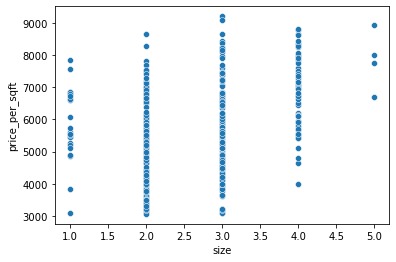

In [68]:
sns.scatterplot(df.groupby("location").get_group("Whitefield")["size"],df.groupby("location").get_group("Whitefield")["price_per_sqft"])

In [69]:
df.shape

(10242, 7)

# Removing Outliers based on "Price_per_sqft" column (based on location)

In [70]:
def remove_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        size_dict = dict()
        for size, size_df in location_df.groupby("size"):
            size_dict[size] = {"mean":size_df["price_per_sqft"].mean(),
                                    "std":size_df["price_per_sqft"].std(),
                                    "count":size_df.shape[0]}
        for size, size_df in location_df.groupby("size"):
            size_stats = size_dict.get(size-1)
            if size_stats and size_stats["count"]>5:
                exclude_indices = np.append(exclude_indices,size_df[(size_df["price_per_sqft"])<(size_stats["mean"])].index.values)
                print(size_dict)
                print(size_stats)
                print(exclude_indices)
    return df.drop(exclude_indices,axis="index")
            
        

In [71]:
df = remove_outliers(df)

{2: {'mean': 4278.125, 'std': 1217.7227502303517, 'count': 8}, 3: {'mean': 4403.8, 'std': 666.6698583256933, 'count': 5}}
{'mean': 4278.125, 'std': 1217.7227502303517, 'count': 8}
[ 0. 12.]
{1: {'mean': 5952.0, 'std': nan, 'count': 1}, 2: {'mean': 7931.875, 'std': 1639.847853351907, 'count': 8}, 3: {'mean': 9151.285714285714, 'std': 1139.1895824496926, 'count': 7}, 4: {'mean': 7538.0, 'std': 1968.1100070880184, 'count': 3}, 5: {'mean': 5667.0, 'std': nan, 'count': 1}}
{'mean': 7931.875, 'std': 1639.847853351907, 'count': 8}
[ 0. 12. 38.]
{1: {'mean': 5952.0, 'std': nan, 'count': 1}, 2: {'mean': 7931.875, 'std': 1639.847853351907, 'count': 8}, 3: {'mean': 9151.285714285714, 'std': 1139.1895824496926, 'count': 7}, 4: {'mean': 7538.0, 'std': 1968.1100070880184, 'count': 3}, 5: {'mean': 5667.0, 'std': nan, 'count': 1}}
{'mean': 9151.285714285714, 'std': 1139.1895824496926, 'count': 7}
[ 0. 12. 38. 20. 33. 35.]
{1: {'mean': 4628.5, 'std': 525.3803384216048, 'count': 2}, 2: {'mean': 5067.294

{2: {'mean': 5621.928571428572, 'std': 825.8542862986195, 'count': 14}, 3: {'mean': 10282.222222222223, 'std': 4064.2525689780214, 'count': 9}, 5: {'mean': 13913.0, 'std': nan, 'count': 1}}
{'mean': 5621.928571428572, 'std': 825.8542862986195, 'count': 14}
[  0.  12.  38.  20.  33.  35.  67.  75.  76.  77.  86. 120. 121. 122.
 128. 129. 136. 137. 143. 146. 163. 180. 186. 194. 198. 125. 206. 208.
 217. 230. 233. 235. 245. 246. 248. 250. 252. 273. 275. 278. 279. 276.
 291. 299. 317. 328. 335. 340. 367. 376. 366. 377. 411. 412. 413. 427.
 435. 443. 461. 509. 532. 563. 564. 565. 567. 574. 555. 582. 585. 589.
 590. 596. 613.]
{2: {'mean': 3800.090909090909, 'std': 444.60801939359004, 'count': 11}, 3: {'mean': 3670.0, 'std': 634.5943586260439, 'count': 10}}
{'mean': 3800.090909090909, 'std': 444.60801939359004, 'count': 11}
[  0.  12.  38.  20.  33.  35.  67.  75.  76.  77.  86. 120. 121. 122.
 128. 129. 136. 137. 143. 146. 163. 180. 186. 194. 198. 125. 206. 208.
 217. 230. 233. 235. 245. 24

 1175. 1178. 1184. 1185. 1105. 1201. 1207. 1212. 1222. 1224. 1234. 1236.]
{2: {'mean': 5417.333333333333, 'std': 298.1336897596395, 'count': 12}, 3: {'mean': 6125.384615384615, 'std': 935.9338953207412, 'count': 13}, 4: {'mean': 5819.8, 'std': 951.9683468127148, 'count': 10}}
{'mean': 6125.384615384615, 'std': 935.9338953207412, 'count': 13}
[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.

{2: {'mean': 4782.166666666667, 'std': 552.4546601442978, 'count': 12}, 3: {'mean': 4993.1, 'std': 632.286758080892, 'count': 10}, 4: {'mean': 8646.0, 'std': nan, 'count': 1}}
{'mean': 4993.1, 'std': 632.286758080892, 'count': 10}
[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.
  869.  871.  877.  882.  893.  895.  898.  899.  902.  904.  908.  917.
  926.  937.  940.  941.  945.  948.  9

[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.
  869.  871.  877.  882.  893.  895.  898.  899.  902.  904.  908.  917.
  926.  937.  940.  941.  945.  948.  949.  951.  954.  973.  975.  839.
  874.  911.  959.  847.  978.  979.  986.  988.  989.  991.  993.  995.
 1017. 1022. 1038. 1049. 1056. 1061. 1064. 1074. 1076. 1080. 1082. 1083.
 1087. 1089. 1107. 1125. 1130. 1139. 1154. 1160. 11

{1: {'mean': 6609.0, 'std': nan, 'count': 1}, 2: {'mean': 4442.407407407408, 'std': 907.5798281387948, 'count': 81}, 3: {'mean': 5508.076923076923, 'std': 946.4244731624441, 'count': 39}, 4: {'mean': 6117.5, 'std': 902.5899955129128, 'count': 6}}
{'mean': 4442.407407407408, 'std': 907.5798281387948, 'count': 81}
[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.
  869.  871.  877.  882.  893

 3160. 3222. 3228.]
{2: {'mean': 4195.15, 'std': 484.6669257824061, 'count': 20}, 3: {'mean': 3953.3333333333335, 'std': 364.39859128889805, 'count': 3}, 6: {'mean': 5263.0, 'std': nan, 'count': 1}}
{'mean': 4195.15, 'std': 484.6669257824061, 'count': 20}
[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.
  869.  871.  877.  882.  893.  895.  898.  899.  902.  904.  908.  917.
  926.  937.  

 3388. 3394. 3408. 3404. 3413. 3418. 3433. 3438. 3449. 3439.]
{3: {'mean': 4935.666666666667, 'std': 663.0051784614254, 'count': 6}, 4: {'mean': 5293.0, 'std': nan, 'count': 1}}
{'mean': 4935.666666666667, 'std': 663.0051784614254, 'count': 6}
[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.
  869.  871.  877.  882.  893.  895.  898.  899.  902.  904.  908.  917.
  926.  937.  940.  941.  

{1: {'mean': 6656.75, 'std': 988.8388392453039, 'count': 4}, 2: {'mean': 6419.083333333333, 'std': 874.8820656453524, 'count': 12}, 3: {'mean': 6351.736842105263, 'std': 728.0597382468972, 'count': 19}, 4: {'mean': 7500.0, 'std': nan, 'count': 1}}
{'mean': 6351.736842105263, 'std': 728.0597382468972, 'count': 19}
[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.
  869.  871.  877.  882.  89

{1: {'mean': 6393.0, 'std': nan, 'count': 1}, 2: {'mean': 4600.923076923077, 'std': 719.35346684117, 'count': 13}, 3: {'mean': 5540.375, 'std': 836.8780313078569, 'count': 8}}
{'mean': 4600.923076923077, 'std': 719.35346684117, 'count': 13}
[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.
  869.  871.  877.  882.  893.  895.  898.  899.  902.  904.  908.  917.
  926.  937.  940.  941.  945

[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.
  869.  871.  877.  882.  893.  895.  898.  899.  902.  904.  908.  917.
  926.  937.  940.  941.  945.  948.  949.  951.  954.  973.  975.  839.
  874.  911.  959.  847.  978.  979.  986.  988.  989.  991.  993.  995.
 1017. 1022. 1038. 1049. 1056. 1061. 1064. 1074. 1076. 1080. 1082. 1083.
 1087. 1089. 1107. 1125. 1130. 1139. 1154. 1160. 11

{1: {'mean': 3250.0, 'std': nan, 'count': 1}, 2: {'mean': 3285.4285714285716, 'std': 215.6276552631543, 'count': 7}, 3: {'mean': 3203.2, 'std': 193.76970867501453, 'count': 5}}
{'mean': 3285.4285714285716, 'std': 215.6276552631543, 'count': 7}
[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.
  869.  871.  877.  882.  893.  895.  898.  899.  902.  904.  908.  917.
  926.  937.  940.  941.  

[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.
  869.  871.  877.  882.  893.  895.  898.  899.  902.  904.  908.  917.
  926.  937.  940.  941.  945.  948.  949.  951.  954.  973.  975.  839.
  874.  911.  959.  847.  978.  979.  986.  988.  989.  991.  993.  995.
 1017. 1022. 1038. 1049. 1056. 1061. 1064. 1074. 1076. 1080. 1082. 1083.
 1087. 1089. 1107. 1125. 1130. 1139. 1154. 1160. 11

[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.
  869.  871.  877.  882.  893.  895.  898.  899.  902.  904.  908.  917.
  926.  937.  940.  941.  945.  948.  949.  951.  954.  973.  975.  839.
  874.  911.  959.  847.  978.  979.  986.  988.  989.  991.  993.  995.
 1017. 1022. 1038. 1049. 1056. 1061. 1064. 1074. 1076. 1080. 1082. 1083.
 1087. 1089. 1107. 1125. 1130. 1139. 1154. 1160. 11

 5034. 5044. 5048. 5055. 5057. 5073. 5074. 5078. 5081.]
{1: {'mean': 6443.6, 'std': 790.9382403196852, 'count': 5}, 2: {'mean': 5342.901408450704, 'std': 811.498123489241, 'count': 71}, 3: {'mean': 5765.169811320755, 'std': 898.0886056990715, 'count': 53}, 4: {'mean': 6160.55, 'std': 828.1850463831327, 'count': 20}}
{'mean': 5765.169811320755, 'std': 898.0886056990715, 'count': 53}
[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841. 

[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.
  869.  871.  877.  882.  893.  895.  898.  899.  902.  904.  908.  917.
  926.  937.  940.  941.  945.  948.  949.  951.  954.  973.  975.  839.
  874.  911.  959.  847.  978.  979.  986.  988.  989.  991.  993.  995.
 1017. 1022. 1038. 1049. 1056. 1061. 1064. 1074. 1076. 1080. 1082. 1083.
 1087. 1089. 1107. 1125. 1130. 1139. 1154. 1160. 11

[   0.   12.   38.   20.   33.   35.   67.   75.   76.   77.   86.  120.
  121.  122.  128.  129.  136.  137.  143.  146.  163.  180.  186.  194.
  198.  125.  206.  208.  217.  230.  233.  235.  245.  246.  248.  250.
  252.  273.  275.  278.  279.  276.  291.  299.  317.  328.  335.  340.
  367.  376.  366.  377.  411.  412.  413.  427.  435.  443.  461.  509.
  532.  563.  564.  565.  567.  574.  555.  582.  585.  589.  590.  596.
  613.  629.  630.  632.  636.  639.  645.  663.  664.  668.  673.  678.
  679.  681.  682.  693.  696.  702.  710.  724.  739.  744.  748.  749.
  754.  708.  774.  816.  841.  845.  851.  853.  857.  859.  862.  864.
  869.  871.  877.  882.  893.  895.  898.  899.  902.  904.  908.  917.
  926.  937.  940.  941.  945.  948.  949.  951.  954.  973.  975.  839.
  874.  911.  959.  847.  978.  979.  986.  988.  989.  991.  993.  995.
 1017. 1022. 1038. 1049. 1056. 1061. 1064. 1074. 1076. 1080. 1082. 1083.
 1087. 1089. 1107. 1125. 1130. 1139. 1154. 1160. 11

{1: {'mean': 2874.25, 'std': 201.32622779955918, 'count': 4}, 2: {'mean': 3604.5454545454545, 'std': 729.3348892530909, 'count': 33}, 3: {'mean': 4676.05, 'std': 1169.34963818175, 'count': 20}, 4: {'mean': 4928.5, 'std': 986.6468748014943, 'count': 10}}
{'mean': 3604.5454545454545, 'std': 729.3348892530909, 'count': 33}
[   0.   12.   38. ... 6009. 6019. 6021.]
{1: {'mean': 2874.25, 'std': 201.32622779955918, 'count': 4}, 2: {'mean': 3604.5454545454545, 'std': 729.3348892530909, 'count': 33}, 3: {'mean': 4676.05, 'std': 1169.34963818175, 'count': 20}, 4: {'mean': 4928.5, 'std': 986.6468748014943, 'count': 10}}
{'mean': 4676.05, 'std': 1169.34963818175, 'count': 20}
[   0.   12.   38. ... 5994. 6015. 6027.]
{1: {'mean': 5133.333333333333, 'std': 1103.432825322865, 'count': 9}, 2: {'mean': 5376.763157894737, 'std': 944.4808594417816, 'count': 114}, 3: {'mean': 6139.2206896551725, 'std': 1186.1551125202195, 'count': 145}, 4: {'mean': 6462.708333333333, 'std': 1379.3768750438717, 'count': 

{1: {'mean': 5827.083333333333, 'std': 1106.0503926198355, 'count': 24}, 2: {'mean': 4996.6551724137935, 'std': 1264.5244035443832, 'count': 232}, 3: {'mean': 5548.17791411043, 'std': 1332.2043457249572, 'count': 163}, 4: {'mean': 6778.142857142857, 'std': 1178.0787507026612, 'count': 56}, 5: {'mean': 7836.75, 'std': 917.5337868438415, 'count': 4}}
{'mean': 5827.083333333333, 'std': 1106.0503926198355, 'count': 24}
[   0.   12.   38. ... 7607. 7609. 7627.]
{1: {'mean': 5827.083333333333, 'std': 1106.0503926198355, 'count': 24}, 2: {'mean': 4996.6551724137935, 'std': 1264.5244035443832, 'count': 232}, 3: {'mean': 5548.17791411043, 'std': 1332.2043457249572, 'count': 163}, 4: {'mean': 6778.142857142857, 'std': 1178.0787507026612, 'count': 56}, 5: {'mean': 7836.75, 'std': 917.5337868438415, 'count': 4}}
{'mean': 4996.6551724137935, 'std': 1264.5244035443832, 'count': 232}
[   0.   12.   38. ... 7616. 7625. 7630.]
{1: {'mean': 5827.083333333333, 'std': 1106.0503926198355, 'count': 24}, 2: 

In [72]:
df.shape

(7331, 7)

In [73]:
df.describe()

,size,total_sqft,bath,balcony,price,price_per_sqft
count,7331.000000,7331.000000,7331.000000,7331.000000,7331.000000,7331.000000
mean,2.498022,1490.270254,2.446869,1.568545,98.514154,6119.495158
std,0.924926,849.839881,1.008562,0.818136,92.365752,2412.027596
min,1.000000,300.000000,1.000000,0.000000,10.000000,1300.000000
25%,2.000000,1095.000000,2.000000,1.000000,50.000000,4590.000000
50%,2.000000,1257.000000,2.000000,2.000000,73.000000,5678.000000
75%,3.000000,1671.000000,3.000000,2.000000,112.000000,6897.000000
max,16.000000,30000.000000,16.000000,12.000000,2200.000000,24510.000000


# One Hot Encoding

In [74]:
df = pd.get_dummies(df,columns=["location"])

In [75]:
df.head()

,size,total_sqft,bath,balcony,price,price_per_sqft,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
1,2,1250.0,2.0,2.0,40.0,3200,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,2.0,83.0,6917,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,2.0,40.0,3419,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,2.0,65.0,4561,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,947.0,2.0,2.0,43.0,4541,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df.drop(columns="price_per_sqft",inplace=True)

# Train Test Split

In [77]:
x = df.drop("price",axis= 1)
y = df["price"]

In [78]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [79]:
model = LinearRegression()

In [80]:
model.fit(X_train,y_train)

LinearRegression()

In [81]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print(f"Training accuracy is {r2_train}\nTesting accuracy is {r2_test}")

Training accuracy is 0.8688049250557592
Testing accuracy is 0.8038878312382117


# K Fold Cross Validation

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [83]:
cv  = ShuffleSplit(n_splits=10,test_size=0.2,random_state=7)

In [84]:
cross_val_score = cross_val_score(model,x,y,cv = cv)

In [85]:
cross_val_score

array([0.80388783, 0.79242147, 0.79845388, 0.78346028, 0.83996579,
       0.87643891, 0.88622705, 0.83548528, 0.85228978, 0.86557703])

In [86]:
test = df.iloc[[1],:]
test.drop(columns=["price"],inplace=True)
test_array =test.to_numpy()


C:\Users\WIN 7\AppData\Local\Temp\ipykernel_9348\1962930014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=["price"],inplace=True)


In [87]:
test_array 

array([[2.0e+00, 1.2e+03, 2.0e+00, 2.0e+00, 1.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
      

In [88]:
model.predict(test_array)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54.73871619])

In [89]:
import pickle

In [92]:
with open("House_Prediction.pkl","wb")as f:
    pickle.dump(model,f)

In [93]:
df.head()

,size,total_sqft,bath,balcony,price,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
1,2,1250.0,2.0,2.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,2.0,83.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,2.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,2.0,65.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,947.0,2.0,2.0,43.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
l = x.columns.to_list()
l

['size',
 'total_sqft',
 'bath',
 'balcony',
 'location_ Devarachikkanahalli',
 'location_1st Block Jayanagar',
 'location_1st Phase JP Nagar',
 'location_2nd Phase Judicial Layout',
 'location_2nd Stage Nagarbhavi',
 'location_5th Block Hbr Layout',
 'location_5th Phase JP Nagar',
 'location_6th Phase JP Nagar',
 'location_7th Phase JP Nagar',
 'location_8th Phase JP Nagar',
 'location_9th Phase JP Nagar',
 'location_AECS Layout',
 'location_Abbigere',
 'location_Akshaya Nagar',
 'location_Ambalipura',
 'location_Ambedkar Nagar',
 'location_Amruthahalli',
 'location_Anandapura',
 'location_Ananth Nagar',
 'location_Anekal',
 'location_Anjanapura',
 'location_Ardendale',
 'location_Arekere',
 'location_Attibele',
 'location_BEML Layout',
 'location_BTM 2nd Stage',
 'location_BTM Layout',
 'location_Babusapalaya',
 'location_Badavala Nagar',
 'location_Balagere',
 'location_Banashankari',
 'location_Banashankari Stage II',
 'location_Banashankari Stage III',
 'location_Banashankari Stag

In [101]:
Encoded_data = {"columns":['size',
 'total_sqft',
 'bath',
 'balcony',
 'location_ Devarachikkanahalli',
 'location_1st Block Jayanagar',
 'location_1st Phase JP Nagar',
 'location_2nd Phase Judicial Layout',
 'location_2nd Stage Nagarbhavi',
 'location_5th Block Hbr Layout',
 'location_5th Phase JP Nagar',
 'location_6th Phase JP Nagar',
 'location_7th Phase JP Nagar',
 'location_8th Phase JP Nagar',
 'location_9th Phase JP Nagar',
 'location_AECS Layout',
 'location_Abbigere',
 'location_Akshaya Nagar',
 'location_Ambalipura',
 'location_Ambedkar Nagar',
 'location_Amruthahalli',
 'location_Anandapura',
 'location_Ananth Nagar',
 'location_Anekal',
 'location_Anjanapura',
 'location_Ardendale',
 'location_Arekere',
 'location_Attibele',
 'location_BEML Layout',
 'location_BTM 2nd Stage',
 'location_BTM Layout',
 'location_Babusapalaya',
 'location_Badavala Nagar',
 'location_Balagere',
 'location_Banashankari',
 'location_Banashankari Stage II',
 'location_Banashankari Stage III',
 'location_Banashankari Stage V',
 'location_Banashankari Stage VI',
 'location_Banaswadi',
 'location_Banjara Layout',
 'location_Bannerghatta',
 'location_Bannerghatta Road',
 'location_Basavangudi',
 'location_Basaveshwara Nagar',
 'location_Battarahalli',
 'location_Begur',
 'location_Begur Road',
 'location_Bellandur',
 'location_Benson Town',
 'location_Bharathi Nagar',
 'location_Bhoganhalli',
 'location_Billekahalli',
 'location_Binny Pete',
 'location_Bisuvanahalli',
 'location_Bommanahalli',
 'location_Bommasandra',
 'location_Bommasandra Industrial Area',
 'location_Bommenahalli',
 'location_Brookefield',
 'location_Budigere',
 'location_CV Raman Nagar',
 'location_Chamrajpet',
 'location_Chandapura',
 'location_Channasandra',
 'location_Chikka Tirupathi',
 'location_Chikkabanavar',
 'location_Chikkalasandra',
 'location_Choodasandra',
 'location_Cooke Town',
 'location_Cox Town',
 'location_Cunningham Road',
 'location_Dasanapura',
 'location_Dasarahalli',
 'location_Devanahalli',
 'location_Dodda Nekkundi',
 'location_Doddaballapur',
 'location_Doddakallasandra',
 'location_Doddathoguru',
 'location_Domlur',
 'location_Dommasandra',
 'location_EPIP Zone',
 'location_Electronic City',
 'location_Electronic City Phase II',
 'location_Electronics City Phase 1',
 'location_Frazer Town',
 'location_GM Palaya',
 'location_Garudachar Palya',
 'location_Giri Nagar',
 'location_Gollarapalya Hosahalli',
 'location_Gottigere',
 'location_Green Glen Layout',
 'location_Gubbalala',
 'location_Gunjur',
 'location_HAL 2nd Stage',
 'location_HBR Layout',
 'location_HRBR Layout',
 'location_HSR Layout',
 'location_Haralur Road',
 'location_Harlur',
 'location_Hebbal',
 'location_Hebbal Kempapura',
 'location_Hegde Nagar',
 'location_Hennur',
 'location_Hennur Road',
 'location_Hoodi',
 'location_Horamavu Agara',
 'location_Horamavu Banaswadi',
 'location_Hormavu',
 'location_Hosa Road',
 'location_Hosakerehalli',
 'location_Hoskote',
 'location_Hosur Road',
 'location_Hulimavu',
 'location_ISRO Layout',
 'location_ITPL',
 'location_Iblur Village',
 'location_Indira Nagar',
 'location_JP Nagar',
 'location_Jakkur',
 'location_Jalahalli',
 'location_Jalahalli East',
 'location_Jigani',
 'location_Judicial Layout',
 'location_KR Puram',
 'location_Kadubeesanahalli',
 'location_Kadugodi',
 'location_Kaggadasapura',
 'location_Kaggalipura',
 'location_Kaikondrahalli',
 'location_Kalena Agrahara',
 'location_Kalyan nagar',
 'location_Kambipura',
 'location_Kammanahalli',
 'location_Kammasandra',
 'location_Kanakapura',
 'location_Kanakpura Road',
 'location_Kannamangala',
 'location_Karuna Nagar',
 'location_Kasavanhalli',
 'location_Kasturi Nagar',
 'location_Kathriguppe',
 'location_Kaval Byrasandra',
 'location_Kenchenahalli',
 'location_Kengeri',
 'location_Kengeri Satellite Town',
 'location_Kereguddadahalli',
 'location_Kodichikkanahalli',
 'location_Kodigehaali',
 'location_Kodigehalli',
 'location_Kodihalli',
 'location_Kogilu',
 'location_Konanakunte',
 'location_Koramangala',
 'location_Kothannur',
 'location_Kothanur',
 'location_Kudlu',
 'location_Kudlu Gate',
 'location_Kumaraswami Layout',
 'location_Kundalahalli',
 'location_LB Shastri Nagar',
 'location_Laggere',
 'location_Lakshminarayana Pura',
 'location_Lingadheeranahalli',
 'location_Magadi Road',
 'location_Mahadevpura',
 'location_Mahalakshmi Layout',
 'location_Mallasandra',
 'location_Malleshpalya',
 'location_Malleshwaram',
 'location_Marathahalli',
 'location_Margondanahalli',
 'location_Marsur',
 'location_Mico Layout',
 'location_Munnekollal',
 'location_Murugeshpalya',
 'location_Mysore Road',
 'location_NGR Layout',
 'location_NRI Layout',
 'location_Nagarbhavi',
 'location_Nagasandra',
 'location_Nagavara',
 'location_Nagavarapalya',
 'location_Narayanapura',
 'location_Neeladri Nagar',
 'location_Nehru Nagar',
 'location_OMBR Layout',
 'location_Old Airport Road',
 'location_Old Madras Road',
 'location_Padmanabhanagar',
 'location_Pai Layout',
 'location_Panathur',
 'location_Parappana Agrahara',
 'location_Pattandur Agrahara',
 'location_Poorna Pragna Layout',
 'location_Prithvi Layout',
 'location_R.T. Nagar',
 'location_Rachenahalli',
 'location_Raja Rajeshwari Nagar',
 'location_Rajaji Nagar',
 'location_Rajiv Nagar',
 'location_Ramagondanahalli',
 'location_Ramamurthy Nagar',
 'location_Rayasandra',
 'location_Sahakara Nagar',
 'location_Sanjay nagar',
 'location_Sarakki Nagar',
 'location_Sarjapur',
 'location_Sarjapur  Road',
 'location_Sarjapura - Attibele Road',
 'location_Sector 2 HSR Layout',
 'location_Sector 7 HSR Layout',
 'location_Seegehalli',
 'location_Shampura',
 'location_Shivaji Nagar',
 'location_Singasandra',
 'location_Somasundara Palya',
 'location_Sompura',
 'location_Sonnenahalli',
 'location_Subramanyapura',
 'location_Sultan Palaya',
 'location_TC Palaya',
 'location_Talaghattapura',
 'location_Thanisandra',
 'location_Thigalarapalya',
 'location_Thubarahalli',
 'location_Tindlu',
 'location_Tumkur Road',
 'location_Ulsoor',
 'location_Uttarahalli',
 'location_Varthur',
 'location_Varthur Road',
 'location_Vasanthapura',
 'location_Vidyaranyapura',
 'location_Vijayanagar',
 'location_Vishveshwarya Layout',
 'location_Vishwapriya Layout',
 'location_Vittasandra',
 'location_Whitefield',
 'location_Yelachenahalli',
 'location_Yelahanka',
 'location_Yelahanka New Town',
 'location_Yelenahalli',
 'location_Yeshwanthpur',
 'location_other']}

In [103]:
import json
with open ("Encoded_json_data.json",'w') as f:
    json.dump(Encoded_data,f)